# CSE-221710309053-Hari Sarmishta

https://docs.google.com/document/d/1VD9r9CFbi3yf-EZLrsEl9nrJq1IkoN7wAD8Nsv6-fgE/edit?usp=sharing

* I hope you have completed the above assignment given on 17-06-2020.
* For the same dataset try these things
* Apply any three algorithms and compare the training and testing metrics of three algorithms. 
* Choose the best one.
* Please provide at least three merits and demerits of the best algorithm.
* Apply GridsearchCV for the best algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Creating a new column Family in the dataset  by adding SibSp column and Parch column
df['Family'] = df['SibSp'] + df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [4]:
# Ticket--> As it is just a random number, we can skip this column from our analysis
df.drop('Ticket',axis=1,inplace=True)

In [5]:
## Imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Family         0.000000
Fare           0.000000
Parch          0.000000
SibSp          0.000000
Gender         0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [6]:
# Removing Cabin column because 77% are missing value
df.drop('Cabin',axis=1,inplace=True)

In [7]:
# Median---> sorting in the order (middle value) NaN in the age column should be substituted with median of age
df.Age.fillna(df.Age.median(), inplace=True)
df.Age.isnull().sum()

0

In [8]:
## Imputing the Embarked Column---> Mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.Embarked.isnull().sum()

0

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Family         0
dtype: int64

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Family           int64
dtype: object

In [11]:
## Remove passenger ID
df.drop('PassengerId',axis=1,inplace=True)

In [12]:
df.drop('Name',axis=1,inplace=True)

In [13]:
df.nunique()

Survived      2
Pclass        3
Gender        2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
Family        9
dtype: int64

In [14]:
## Seperating the Input and Output Data, dropping the Survived column from the data
X = df.drop('Survived', axis=1)
X.shape

(891, 8)

In [15]:
X= pd.get_dummies(X)
X.shape

(891, 11)

In [16]:
## Output Column
y = df.iloc[:,0]
y.shape


(891,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23) 
                                                        # random_state = to select the constant rows


In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 11)
(223, 11)
(668,)
(223,)


In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000) # creating an object for Logistic Regression
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)

In [20]:
## accuracy_score---> With help of this metric, we can evaluate the overall 
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.8098802395209581

In [21]:
# Importing the package
from sklearn.ensemble import AdaBoostClassifier
# Instance creation
adc = AdaBoostClassifier()
# Train the model
adc.fit(X_train,y_train)
# prediction
y_pred = adc.predict(X_test)

In [22]:
accuracy_score(y_pred, y_test)

0.8071748878923767

In [23]:
accuracy_score(y_train,adc.predict(X_train) )

0.8413173652694611

In [24]:
adc

AdaBoostClassifier()

### try it with different parameters

### EX: learning rate = 0.5 n_estimators = 25

In [25]:
# Importing the package
from sklearn.ensemble import AdaBoostClassifier
# Instance creation
adc = AdaBoostClassifier(learning_rate = 1,n_estimators = 75)
# Train the model
adc.fit(X_train,y_train)
# prediction
y_pred = adc.predict(X_test)
print("test accuarcy",accuracy_score(y_pred, y_test))
print("train accuarcy",accuracy_score(y_train,adc.predict(X_train) ))

test accuarcy 0.7982062780269058
train accuarcy 0.8398203592814372


### With base learner

In [26]:
# Importing the package
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# Instance creation with base estimator
adc = AdaBoostClassifier(base_estimator= LogisticRegression())
# Train the model
adc.fit(X_train,y_train)
# prediction
y_pred = adc.predict(X_test)
print("test accuarcy",accuracy_score(y_pred, y_test))
print("train accuarcy",accuracy_score(y_train,adc.predict(X_train) ))

test accuarcy 0.7623318385650224
train accuarcy 0.8068862275449101


In [27]:
# import the algo
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier()
gdc.fit(X_train,y_train)
# prediction
y_pred = gdc.predict(X_test)
print("test accuarcy",accuracy_score(y_pred, y_test))
print("train accuarcy",accuracy_score(y_train,gdc.predict(X_train) ))

test accuarcy 0.8026905829596412
train accuarcy 0.905688622754491


### Scores with different parameters

    Sai Rohit
    learning_rate=1
    test accuracy:  0.8116591928251121
    Train accuracy:  0.9835329341317365
    Venkat
    train :0.905688622754491
    test :0.8026905829596412
    SAI
    n_estimators=40
    test accuracy: 0.820627802690583
    train accuracy: 0.8622754491017964

## XGBoost

In [28]:
!pip install pyyaml

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
# make prediction
preds = xgb.predict(X_test)
print("test accuarcy",accuracy_score(preds, y_test))
print("train accuarcy",accuracy_score(y_train,xgb.predict(X_train) ))

C:\Users\User\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\User\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


test accuarcy 0.7937219730941704
train accuarcy 0.9730538922155688


In [30]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
### Check the documentation
help(xgb)

Help on XGBClassifier in module xgboost.sklearn object:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(objective='binary:logistic', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective function to be used (see note below).
 |      booster: string
 |          Specify which booster to use: gbtree, gblinear or dart.
 |      tree_method: string
 |          Specify which tree method to use.  Default to auto.  If this parameter
 |          is set to default, XGBoost will choose the mo

### xgboost is the best algorithm 

In [32]:
from sklearn.tree import DecisionTreeClassifier

# intialization of object
dtree = DecisionTreeClassifier(criterion = 'entropy')

#Applying the classifier to the dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [33]:
y_train_pred=xgb.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       404
           1       0.98      0.95      0.97       264

    accuracy                           0.97       668
   macro avg       0.98      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



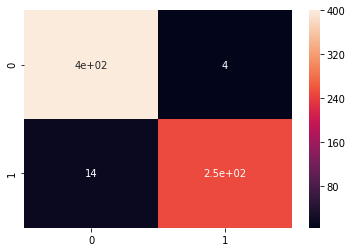

In [35]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

In [36]:
y_test_pred = xgb.predict(X_test) # corresponding output of X_test is stored in y_test
# Compare the actual y_test values with model predicted y_test_pred
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       145
           1       0.71      0.71      0.71        78

    accuracy                           0.79       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



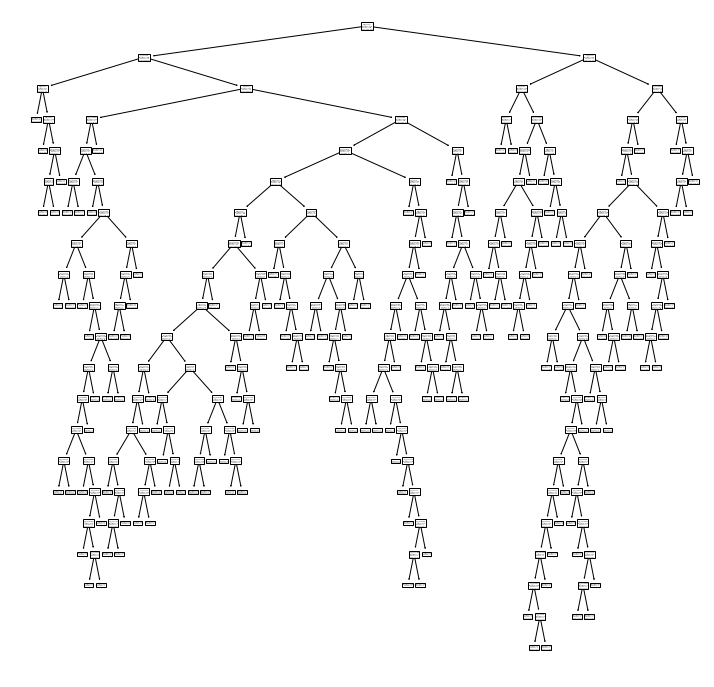

In [37]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,12))
tree.plot_tree(dtree)
plt.show()

In [38]:
grid_param={'criterion' : ['gini','entropy'],
           'max_depth' : range(2,32,1),
           'min_samples_leaf' : range(1,10,1)}

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
grid_search = GridSearchCV(estimator=dtree,param_grid = grid_param)
clf = DecisionTreeClassifier()
# applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10)})

In [41]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8}

In [42]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1)

# We need to fit the model to the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [43]:
# Prediction on test data
pred_test = clf.predict(X_test)

#Classification Report of actual values 
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85       145
           1       0.84      0.49      0.62        78

    accuracy                           0.79       223
   macro avg       0.81      0.72      0.74       223
weighted avg       0.80      0.79      0.77       223

